
# Aprendizado de regressores

<AxesSubplot:xlabel='Profit in $ 10,000s', ylabel='Population in City in 10,000s'>

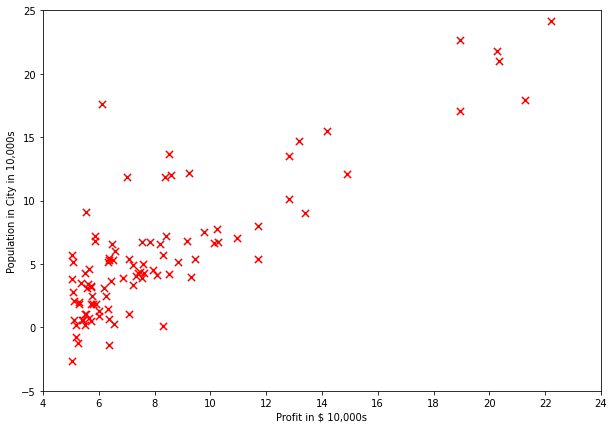

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd

FOOD_TRUCK = "am-T1-dados"


def load_data(food_truck=FOOD_TRUCK):
    os.makedirs(food_truck, exist_ok=True)
    txt_path = os.path.join(food_truck, "ex1data1.txt")
    return pd.read_csv(txt_path, sep=",", header=None, names=["Profit in $ 10,000s", "Population in City in 10,000s"])


food_truck = load_data()
food_truck.plot(kind="scatter", x="Profit in $ 10,000s", s=52, ylim=(-5, 25), xlim=(4, 24),
                xticks=np.arange(4, 25, 2), y="Population in City in 10,000s", marker='x', c='red', figsize=(10, 7))


## Regressão com uma Variavel

In [2]:

from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeRegressor
import numpy as np

from time import time
from scipy.stats import randint as sp_randint
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

data = load_data()
x = np.array(data['Profit in $ 10,000s']).reshape(-1, 1)
y = np.array(data['Population in City in 10,000s'])


def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")
            

knn = KNeighborsRegressor(n_neighbors=1)
param_dist = {"n_neighbors": np.arange(1,30)}


# run randomized search
n_iter_search = 20
random_search_knn = RandomizedSearchCV(knn, param_distributions=param_dist,
                                   n_iter=n_iter_search, cv=5, scoring="neg_mean_absolute_error")

start = time()
random_search_knn.fit(x, y)
print("RandomizedSearchCV took %.2f seconds for %d candidates"
      " parameter settings." % ((time() - start), n_iter_search))
report(random_search_knn.cv_results_)
random_search_knn.best_params_

rmse = np.sqrt(-random_search_knn.best_score_)
rmse

RandomizedSearchCV took 0.18 seconds for 20 candidates parameter settings.
Model with rank: 1
Mean validation score: -2.741 (std: 0.782)
Parameters: {'n_neighbors': 5}

Model with rank: 2
Mean validation score: -2.815 (std: 0.770)
Parameters: {'n_neighbors': 6}

Model with rank: 3
Mean validation score: -2.838 (std: 0.753)
Parameters: {'n_neighbors': 9}



1.655595553522087

### Nesta parte do Trabalho foi feito uma tarefa de regressão utilizando KNeighborsRegressor (KNN). Primeiramente buscou se splitar os valores que seram usados para treino e os valores utilizados para o teste utilizando cross validation atribuido com valor cv=5. Uitilizou se tambem nessa etapa a classe RandomizedSearchCV, que testa randomicamente os melhores valores de hiperparametro n_neighbors com um range de 1 ao 30  na variavel param_dist

In [3]:
param_dist = {"max_depth": [2,3,4,5,6],
              "criterion": ["mae", "mse","friedman_mse"]}

tree = DecisionTreeRegressor()

# run randomized search
n_iter_search = 15
random_search = RandomizedSearchCV(tree, param_distributions=param_dist,
                                   n_iter=n_iter_search, cv=5, scoring="neg_mean_absolute_error")

start = time()
random_search.fit(x,y)

print("RandomizedSearchCV took %.2f seconds for %d candidates"
      " parameter settings." % ((time() - start), n_iter_search))
report(random_search.cv_results_)
random_search.best_params_ 
import numpy as np

rmse = np.sqrt(-random_search.best_score_)
rmse



RandomizedSearchCV took 0.10 seconds for 15 candidates parameter settings.
Model with rank: 1
Mean validation score: -2.702 (std: 0.898)
Parameters: {'max_depth': 3, 'criterion': 'mae'}

Model with rank: 2
Mean validation score: -2.782 (std: 0.789)
Parameters: {'max_depth': 2, 'criterion': 'mae'}

Model with rank: 3
Mean validation score: -2.820 (std: 0.711)
Parameters: {'max_depth': 2, 'criterion': 'mse'}

Model with rank: 3
Mean validation score: -2.820 (std: 0.711)
Parameters: {'max_depth': 2, 'criterion': 'friedman_mse'}



1.643905883142821

### Nesta parte do Trabalho foi feito o treinamento com a class DecisionTreeRegressor(Arvore de decisão utilizada para uma tarega de regressão). Tambem uitilizou se nessa etapa a classe RandomizedSearchCV.  Essa classe foii configuranda randomicamente, e os valores do hiperparametro max_depth (profundidade da arvore) [2,3,4,5,6] e o criterion ["mae", "mse","friedman_mse"]  mean squared error , mean absolute error foram definidos com o uso RandomizedSearchCV retornando os melhores hiperparametros para este uso. Obtem se tambem o RMSE._

## Regressao com Multiplas Variaveis

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
from sklearn.preprocessing import StandardScaler


DATA_BASE = "am-T1-dados"

def load_properties_sell(properties_sell=DATA_BASE):
    os.makedirs(properties_sell, exist_ok=True)
    txt_path = os.path.join(properties_sell, "ex1data2.txt")
    return np.loadtxt(txt_path, delimiter=",")


properties_sell = load_properties_sell()

X_s = properties_sell[:,:2]
y = properties_sell[:,2]
scaler = StandardScaler()

X_s_normalize = scaler.fit_transform(X_s)

In [2]:

knn = KNeighborsRegressor()
param_knn = {"n_neighbors": np.arange(1,30)}

# run randomized search
n_iter_search = 15
random_search_knn = RandomizedSearchCV(knn, param_distributions=param_knn,
                                   n_iter=n_iter_search, cv=10,scoring='neg_mean_squared_error',verbose = 2)

start = time()
random_search_knn.fit(X_s_normalize, y)
print(random_search.best_params_)

rmse = np.sqrt(-random_search_knn.best_score_)
print(f'RMSE: {rmse}')

NameError: name 'KNeighborsRegressor' is not defined

### Nesta etapa do trabalho é efetuado o mesmo processo que anterior só que nessa parte alem da quantidade de dormitorios do imovel obtido na segunda coluna, se tem tambem o preço do imovel obtido através da  coluna 3 . Neste caso é necessario fazer uma normalização, porque a uma grande disparidade entre os valores das duas colunas. Devido a isso usa se a classe StandardScaler para normalizar os valores de x. Outro ponto importante é que a cross validation agora é configurada para 10. 

In [6]:

param_tree = {"max_depth": [2,3,4,5,6],
              "criterion": ["mae", "mse","friedman_mse"]}

# run randomized search
n_iter_search = 15
random_search = RandomizedSearchCV(tree, param_distributions=param_tree,
                                   n_iter=n_iter_search, cv=10,scoring='neg_mean_squared_error',verbose = 2)

random_search.fit(X_s_normalize, y)

print(random_search.best_params_)
import numpy as np
rmse = np.sqrt(-random_search.best_score_)
rmse

Fitting 10 folds for each of 15 candidates, totalling 150 fits
[CV] max_depth=2, criterion=mae ......................................
[CV] ....................... max_depth=2, criterion=mae, total=   0.0s
[CV] max_depth=2, criterion=mae ......................................
[CV] ....................... max_depth=2, criterion=mae, total=   0.0s
[CV] max_depth=2, criterion=mae ......................................
[CV] ....................... max_depth=2, criterion=mae, total=   0.0s
[CV] max_depth=2, criterion=mae ......................................
[CV] ....................... max_depth=2, criterion=mae, total=   0.0s
[CV] max_depth=2, criterion=mae ......................................
[CV] ....................... max_depth=2, criterion=mae, total=   0.0s
[CV] max_depth=2, criterion=mae ......................................
[CV] ....................... max_depth=2, criterion=mae, total=   0.0s
[CV] max_depth=2, criterion=mae ......................................
[CV] .........

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] .............. max_depth=2, criterion=friedman_mse, total=   0.0s
[CV] max_depth=2, criterion=friedman_mse .............................
[CV] .............. max_depth=2, criterion=friedman_mse, total=   0.0s
[CV] max_depth=3, criterion=friedman_mse .............................
[CV] .............. max_depth=3, criterion=friedman_mse, total=   0.0s
[CV] max_depth=3, criterion=friedman_mse .............................
[CV] .............. max_depth=3, criterion=friedman_mse, total=   0.0s
[CV] max_depth=3, criterion=friedman_mse .............................
[CV] .............. max_depth=3, criterion=friedman_mse, total=   0.0s
[CV] max_depth=3, criterion=friedman_mse .............................
[CV] .............. max_depth=3, criterion=friedman_mse, total=   0.0s
[CV] max_depth=3, criterion=friedman_mse .............................
[CV] .............. max_depth=3, criterion=friedman_mse, total=   0.0s
[CV] max_depth=3, criterion=friedman_mse .............................
[CV] .

[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.3s finished


76868.27556246392

# Aprendizado de classificadores

Text(0, 0.5, 'Exam 2 Score')

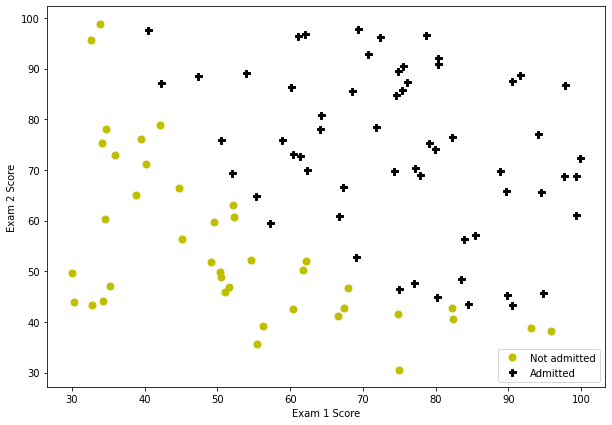

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import os
import matplotlib.pyplot as plt
import pandas as pd

DATA_BASE = "am-T1-dados"

# 3.1 Visualiza¸c˜ao dos dados

def load_student_grade(properties_sell=DATA_BASE):
    os.makedirs(properties_sell, exist_ok=True)
    txt_path = os.path.join(properties_sell, "ex2data1.txt")
    return np.loadtxt(txt_path, delimiter=",")

data = load_student_grade()
x_values = data[:,:2]
clasz  = data[:,2]

pos = data[np.where(clasz == 0)]
neg = data[np.where(clasz == 1)]

plt.figure(figsize=(10, 7))
plt.plot(pos[:,0], pos[:,1],'y.',marker='o',markersize=7, label="Not admitted");
plt.plot(neg[:,0], neg[:,1],'k.', marker='P',markersize=7, label="Admitted");
plt.legend(loc=4)
plt.xlabel("Exam 1 Score", fontsize=10)
plt.ylabel("Exam 2 Score", rotation=90, fontsize=10)

### Nessa parte do trabalho busca se  avaliar diversos modelos de ML.GaussianNB,LogisticRegression,KNeighborsClassifier eDecisionTreeClassifier.Um ponto importante é que utilizamos como metrica dois metodos, confusion_matrix e classfication report. O primeiro é uma tecnica que busca  avaliar de se o modelo de predição esta avaliando corretamente. Sendo  que  neste exemplo existe uma matriz 2x2  onde  existe uma aba representando True Positive,False Positive, False Positive e True Negative. Cada um desses valores correspondem a espectativa da predicao donosso modelo .O metodo classification_report demonstra diversos valores como acurracy, precision, recall e F1, obtidos atraves da matrix de confusão 

### GaussianNB

In [8]:
# splitting X and y into training and testing sets 
from sklearn.model_selection import train_test_split 
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


X_train, X_test, y_train, y_test = train_test_split(x_values,clasz, test_size=0.2, random_state=0) 

target_names = ['Not admitted','Admitted']


# training the model on training set 
gnb = GaussianNB() 
gnb.fit(X_train, y_train) 
gnb_clasz_pred = gnb.predict(X_test) 

print("Gaussian Naive Bayes model accuracy(in %):", metrics.accuracy_score(y_test, gnb_clasz_pred)*100)


print(classification_report(y_test, gnb_clasz_pred, target_names=target_names))
confusion_matrix(y_test,gnb_clasz_pred)



Gaussian Naive Bayes model accuracy(in %): 80.0
              precision    recall  f1-score   support

Not admitted       0.67      1.00      0.80         8
    Admitted       1.00      0.67      0.80        12

    accuracy                           0.80        20
   macro avg       0.83      0.83      0.80        20
weighted avg       0.87      0.80      0.80        20



array([[8, 0],
       [4, 8]])

### LogisticRegression

In [9]:
from sklearn.linear_model import LogisticRegression
lgr = LogisticRegression()
lgr.fit(X_train, y_train) 
lgr_clasz_pred = lgr.predict(X_test) 
print("Logistic regression model accuracy(in %):", metrics.accuracy_score(y_test, lgr_clasz_pred)*100)


print(classification_report(y_test, lgr_clasz_pred, target_names=target_names))
confusion_matrix(y_test,lgr_clasz_pred)



Logistic regression model accuracy(in %): 80.0
              precision    recall  f1-score   support

Not admitted       0.67      1.00      0.80         8
    Admitted       1.00      0.67      0.80        12

    accuracy                           0.80        20
   macro avg       0.83      0.83      0.80        20
weighted avg       0.87      0.80      0.80        20



array([[8, 0],
       [4, 8]])

### KNeighborsClassifier

In [10]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, y_train) 
neigh_clasz_pred = neigh.predict(X_test)

print("KNeighbors model accuracy(in %):", metrics.accuracy_score(y_test, neigh_clasz_pred)*100)


print(classification_report(y_test, neigh_clasz_pred, target_names=target_names))
confusion_matrix(y_test, neigh_clasz_pred)



KNeighbors model accuracy(in %): 90.0
              precision    recall  f1-score   support

Not admitted       0.80      1.00      0.89         8
    Admitted       1.00      0.83      0.91        12

    accuracy                           0.90        20
   macro avg       0.90      0.92      0.90        20
weighted avg       0.92      0.90      0.90        20



array([[ 8,  0],
       [ 2, 10]])

### DecisionTreeClassifier

In [11]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
dtf = DecisionTreeClassifier()
dtf.fit(X_train, y_train) 
dtf_clasz_pred = dtf.predict(X_test) 

print("Decision Tree Classifier (in %):", metrics.accuracy_score(y_test, dtf_clasz_pred)*100)
print(classification_report(y_test, dtf_clasz_pred, target_names=target_names))
confusion_matrix(y_test, dtf_clasz_pred)


Decision Tree Classifier (in %): 75.0
              precision    recall  f1-score   support

Not admitted       0.64      0.88      0.74         8
    Admitted       0.89      0.67      0.76        12

    accuracy                           0.75        20
   macro avg       0.76      0.77      0.75        20
weighted avg       0.79      0.75      0.75        20



array([[7, 1],
       [4, 8]])

##  Mapeamento de caracterısticas (feature mapping)

### Nesta parte usa se regularização com grau 6 com objetivo de ter uma modelo mas ajustado ao nosso treinamento. 

In [12]:
from sklearn.preprocessing import PolynomialFeatures


poly = PolynomialFeatures(6)
x_values_multi = poly.fit_transform(x_values)

X_train, X_test, y_train, y_test = train_test_split(x_values_multi,clasz, test_size=0.2, random_state=0) 


In [13]:
from sklearn.linear_model import LogisticRegression
lgr = LogisticRegression()
lgr.fit(X_train, y_train) 
lgr_clasz_pred = lgr.predict(X_test) 

print("Logistic regression model accuracy(in %):", metrics.accuracy_score(y_test, lgr_clasz_pred)*100)
print(classification_report(y_test, lgr_clasz_pred, target_names=target_names))
confusion_matrix(y_test,lgr_clasz_pred)

Logistic regression model accuracy(in %): 100.0
              precision    recall  f1-score   support

Not admitted       1.00      1.00      1.00         8
    Admitted       1.00      1.00      1.00        12

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



array([[ 8,  0],
       [ 0, 12]])

## Esboço Fronteira de Decisão

### Objetivo nessa parte do trabalho é criar novas caracteristicas a partir das que ja estão sendo usadas , para isso utiliza se a classe PolynomialFeatures  com grau 6 .

In [14]:
from sklearn.pipeline import Pipeline

pipe = Pipeline([('polynomial_features', PolynomialFeatures(degree=6)), ('lgr', LogisticRegression())])
pipe.fit(x_values, clasz)

Pipeline(steps=[('polynomial_features', PolynomialFeatures(degree=6)),
                ('lgr', LogisticRegression())])

In [23]:
from matplotlib.colors import ListedColormap

def plot_decision_surface(X, y, predictor, ax_delta=1.0, mesh_res = 0.1, alpha=0.4, bscatter=1,  
                          figs_x1=12.0, figs_x2=8.0):

    
    pos = np.where(y==1)
    neg = np.where(y==0)
    
    plt.figure(figsize=(10, 7))
    p1 = plt.plot(X[pos,0], X[pos,1],'y.', marker='+', markersize=7, color='k')[0]
    p2 = plt.plot(X[neg,0], X[neg,1],'k.', marker='o', markersize=7, color='y')[0]

    plt.legend(loc=4)
    plt.xlabel("Exam 1 Score", fontsize=10)
    plt.ylabel("Exam 2 Score", rotation=90, fontsize=10)

    # mesh points 
    resolution = mesh_res
    x1_min, x1_max = X[:, 0].min()  - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min()  - 1, X[:, 1].max() + 1
    xm1, xm2 = np.meshgrid( np.arange(x1_min, x1_max, resolution), 
                            np.arange(x2_min, x2_max, resolution))
    mesh_points = np.array([xm1.ravel(), xm2.ravel()]).T

    # predicted vals 
    Z = predictor.predict(mesh_points)
    Z = Z.reshape(xm1.shape)

    # plot contur areas 
    p3 = plt.contour(xm1, xm2,Z, levels=[0]).collections[0]


    plt.legend((p1,p2, p3),('Admitted', 'Not Admitted', 'Fronteira de Decisão'),fontsize=10, numpoints=1, handlelength=0)
    plt.show(block=False)

No handles with labels found to put in legend.
<ipython-input-23-ed8b7ad11ce5>:31: UserWarning: No contour levels were found within the data range.
  p3 = plt.contour(xm1, xm2,Z, levels=[0]).collections[0]


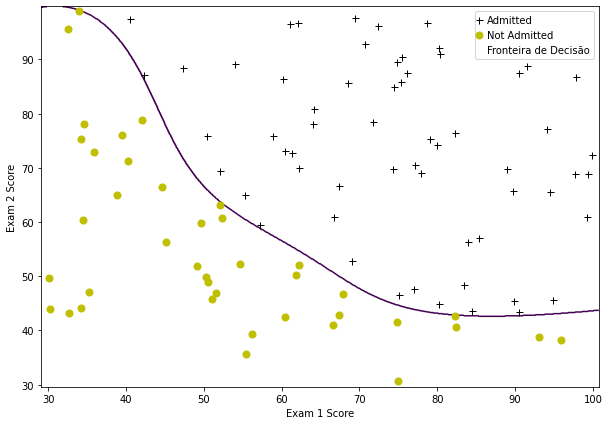

In [24]:
plot_decision_surface(x_values,clasz,pipe)

### Ao fazer a regularizacao o seu modelo pode sofrer de overfit, ou seja, ele se ajusta muito bem para os valores existentes para treinamento mas falha em gerneralizar novos valores quando submetido a dados teste

# Regularização

In [25]:
import scipy.io
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt

mat = scipy.io.loadmat('am-T1-dados/ex5data1.mat')

X = mat["X"]
y = mat["y"]
Xval = mat["Xval"]
yval = mat["yval"]
Xtest = mat["Xtest"]
ytest = mat["ytest"]

m = X.shape[0]

##  Visualização dos Dados

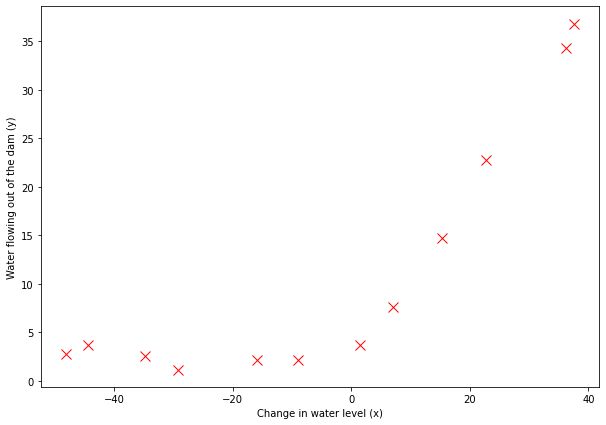

In [26]:

plt.figure(figsize=(10, 7))
plt.plot(X, y, 'rx', markersize=10, linewidth=1.5)
plt.xlabel('Change in water level (x)')
plt.ylabel('Water flowing out of the dam (y)')
plt.show(block=False)

## Ajuste de um regressor linear | Curvas de aprendizado

/Users/diegosilvadesalles/Documents/mestrado/Material Mestrado/Bezerra Machine Learning/codes/bezerra-works/trabalho2/trabalho2/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:1350: RuntimeWarning: Removed duplicate entries from 'train_sizes'. Number of ticks will be less than the size of 'train_sizes' 9 instead of 10).
  warnings.warn("Removed duplicate entries from 'train_sizes'. Number "


Training scores:

 [[-0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
  -0.00000000e+00]
 [-3.71750702e-29 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
  -0.00000000e+00]
 [-5.85185260e+01 -6.57319009e+00 -6.57319009e+00 -6.57319009e+00
  -6.57319009e+00]
 [-5.51651851e+01 -1.49845764e+01 -5.68535538e+00 -5.68535538e+00
  -5.68535538e+00]
 [-4.43001645e+01 -1.86631327e+01 -2.63080976e+01 -2.63080976e+01
  -2.63080976e+01]
 [-5.49190051e+01 -3.02729626e+01 -3.88879250e+01 -3.88879250e+01
  -3.88879250e+01]
 [-5.14416313e+01 -3.64255523e+01 -5.17606029e+01 -4.01970433e+01
  -4.01970433e+01]
 [-5.13745879e+01 -3.74476491e+01 -5.40693573e+01 -3.63457174e+01
  -3.63457174e+01]
 [-4.70009285e+01 -3.45442352e+01 -5.69210693e+01 -4.19159257e+01
  -4.52188108e+01]]

 ----------------------------------------------------------------------

Validation scores:

 [[-827.48611597 -401.59942884  -79.19249676   -2.56520775 -227.64182874]
 [ -89.53930838 -319.70334348  -54.78698095   -

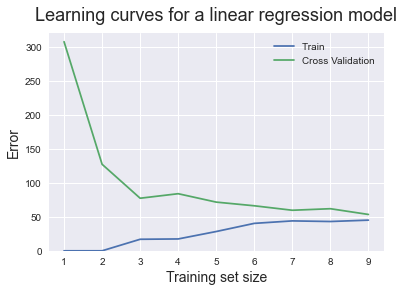

In [27]:
train_sizes = np.arange(0.1, 1.1, 0.1)
    
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
import pandas as pd

train_sizes, train_scores, validation_scores = learning_curve(estimator = LinearRegression(),
                                                                X = X, y = y, train_sizes = train_sizes, cv = 5,
                                                                scoring = 'neg_mean_squared_error')

print('Training scores:\n\n', train_scores)
print('\n', '-' * 70) # separator to make the output easy to read
print('\nValidation scores:\n\n', validation_scores)


train_scores_mean = -train_scores.mean(axis = 1)
validation_scores_mean = -validation_scores.mean(axis = 1)
print('Mean training scores\n\n', pd.Series(train_scores_mean, index = train_sizes))
print('\n', '-' * 20) # separator
print('\nMean validation scores\n\n',pd.Series(validation_scores_mean, index = train_sizes))


plt.figure(2)
plt.style.use('seaborn')
plt.plot(train_sizes, train_scores_mean, label = 'Train ')
plt.plot(train_sizes, validation_scores_mean, label = 'Cross Validation')
plt.ylabel('Error', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curves for a linear regression model', fontsize = 18, y = 1.03)
plt.legend()
plt.ylim(0,320)
plt.show(block=False)

### Aqui observamos que quanto maior  é quantidade de dados de treino, menor é o erro que vamos obter. Através deste grafico pode  se observar se o  modelo esta sofrendo de overfit , underfit  ou esta  corretamente fitado. As curvas de aprendizagem demonstram o desempenho do modelo,  podebdo ser usadas para  avaliar se o dataset de treinamento ou validação esta representando o domínio do problema

## Ajuste de um regressor polinomial não-regularizado

/Users/diegosilvadesalles/Documents/mestrado/Material Mestrado/Bezerra Machine Learning/codes/bezerra-works/trabalho2/trabalho2/lib/python3.8/site-packages/sklearn/utils/validation.py:67: FutureWarning: Pass fit_intercept=0 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


Training scores:

 [[-5.04870979e-29 -7.88860905e-31 -7.88860905e-31 -7.88860905e-31
  -7.88860905e-31]
 [-4.19082356e-29 -9.86076132e-32 -9.86076132e-32 -9.86076132e-32
  -9.86076132e-32]
 [-7.05373126e-29 -2.66240556e-29 -2.66240556e-29 -2.66240556e-29
  -2.66240556e-29]
 [-2.88693509e-27 -6.55247589e-29 -3.36547784e-28 -3.36547784e-28
  -3.36547784e-28]
 [-2.95014257e-27 -6.78183720e-28 -1.10519413e-28 -1.10519413e-28
  -1.10519413e-28]
 [-4.52083037e-28 -8.80270163e-28 -2.82905242e-28 -2.82905242e-28
  -2.82905242e-28]
 [-5.24857334e-27 -1.92876491e-28 -2.56385992e-26 -5.56913824e-26
  -5.56913824e-26]
 [-3.75595905e-26 -3.58325275e-27 -5.88521050e-28 -7.72988161e-27
  -7.72988161e-27]
 [-9.03050713e-27 -5.53811033e-27 -1.11746530e-27 -9.24260114e-28
  -4.06986489e-28]]

 ----------------------------------------------------------------------

Validation scores:

 [[-9.72725842e+00 -4.24532903e+02 -8.81057675e+01 -2.11307268e+00
  -2.47593302e+02]
 [-9.55274410e+00 -6.94775640e+02 -

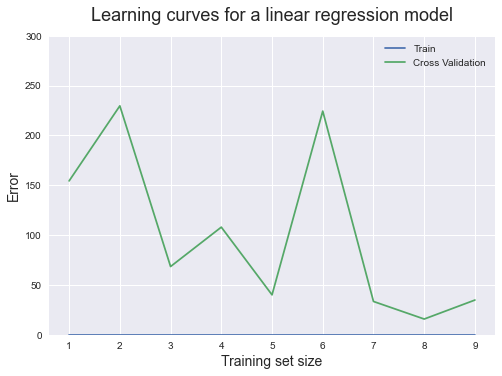

In [37]:

from sklearn.pipeline import Pipeline


from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline




scaler = StandardScaler()
X_s_normalize = scaler.fit_transform(X)


poly = PolynomialFeatures(8)
x_values_multi = poly.fit_transform(X_s_normalize)


train_sizes, train_scores, validation_scores = learning_curve(estimator = LinearRegression(0),
                                                                X = x_values_multi, y = y, train_sizes = train_sizes, cv = 5,
                                                                scoring = 'neg_mean_squared_error')
    
print('Training scores:\n\n', train_scores)
print('\n', '-' * 70) # separator to make the output easy to read
print('\nValidation scores:\n\n', validation_scores)


train_scores_mean = -train_scores.mean(axis = 1)
validation_scores_mean = -validation_scores.mean(axis = 1)
print('Mean training scores\n\n', pd.Series(train_scores_mean, index = train_sizes))
print('\n', '-' * 20) # separator
print('\nMean validation scores\n\n',pd.Series(validation_scores_mean, index = train_sizes))



plt.style.use('seaborn')
plt.plot(train_sizes, train_scores_mean, label = 'Train')
plt.plot(train_sizes, validation_scores_mean, label = 'Cross Validation')
plt.ylabel('Error', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curves for a linear regression model', fontsize = 18, y = 1.03)
plt.legend()
plt.ylim(0,300)
plt.show(block=False)

### Ajuste de um regressor polinomial regularizado

In [48]:
from sklearn.model_selection import GridSearchCV
from sklearn import linear_model


lasso_params = {'fit__alpha':[0.005, 0.02, 0.03, 0.05, 0.06]}
ridge_params = {'fit__alpha':[550, 580, 600, 620, 650]}

pipe1 = Pipeline([('poly', PolynomialFeatures(degree=0)),
                 ('fit', linear_model.Lasso())])
pipe2 = Pipeline([('poly', PolynomialFeatures(degree=0)),
                 ('fit', linear_model.Ridge())])

models = {
           'Lasso': GridSearchCV(pipe1, 
                                 param_grid=lasso_params),
           'Ridge': GridSearchCV(pipe2, 
                                 param_grid=ridge_params)}

/Users/diegosilvadesalles/Documents/mestrado/Material Mestrado/Bezerra Machine Learning/codes/bezerra-works/trabalho2/trabalho2/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/diegosilvadesalles/Documents/mestrado/Material Mestrado/Bezerra Machine Learning/codes/bezerra-works/trabalho2/trabalho2/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/diegosilvadesalles/Documents/mestrado/Material Mestrado/Bezerra Machine Learning/codes/bezerra-works/trabalho2/trabalho2/lib/python3.8/site-packages/sklearn/utils/validation.py", line 72, in inner_f
    return f(**kwargs)
  File "/Users/diegosilvadesalles/Documents/mestrado/Material Mestrado/Bezerra Machine Learning/codes/bezerra-works

/Users/diegosilvadesalles/Documents/mestrado/Material Mestrado/Bezerra Machine Learning/codes/bezerra-works/trabalho2/trabalho2/lib/python3.8/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/diegosilvadesalles/Documents/mestrado/Material Mestrado/Bezerra Machine Learning/codes/bezerra-works/trabalho2/trabalho2/lib/python3.8/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/diegosilvadesalles/Documents/mestrado/Material Mestrado/Bezerra Machine Learning/codes/bezerra-works/trabalho2/trabalho2/lib/python3.8/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/diegosilvadesalles/Documents/mestrad

/Users/diegosilvadesalles/Documents/mestrado/Material Mestrado/Bezerra Machine Learning/codes/bezerra-works/trabalho2/trabalho2/lib/python3.8/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/diegosilvadesalles/Documents/mestrado/Material Mestrado/Bezerra Machine Learning/codes/bezerra-works/trabalho2/trabalho2/lib/python3.8/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/diegosilvadesalles/Documents/mestrado/Material Mestrado/Bezerra Machine Learning/codes/bezerra-works/trabalho2/trabalho2/lib/python3.8/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/diegosilvadesalles/Documents/mestrad

/Users/diegosilvadesalles/Documents/mestrado/Material Mestrado/Bezerra Machine Learning/codes/bezerra-works/trabalho2/trabalho2/lib/python3.8/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/diegosilvadesalles/Documents/mestrado/Material Mestrado/Bezerra Machine Learning/codes/bezerra-works/trabalho2/trabalho2/lib/python3.8/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/diegosilvadesalles/Documents/mestrado/Material Mestrado/Bezerra Machine Learning/codes/bezerra-works/trabalho2/trabalho2/lib/python3.8/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/diegosilvadesalles/Documents/mestrad

/Users/diegosilvadesalles/Documents/mestrado/Material Mestrado/Bezerra Machine Learning/codes/bezerra-works/trabalho2/trabalho2/lib/python3.8/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/diegosilvadesalles/Documents/mestrado/Material Mestrado/Bezerra Machine Learning/codes/bezerra-works/trabalho2/trabalho2/lib/python3.8/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/diegosilvadesalles/Documents/mestrado/Material Mestrado/Bezerra Machine Learning/codes/bezerra-works/trabalho2/trabalho2/lib/python3.8/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/diegosilvadesalles/Documents/mestrad

/Users/diegosilvadesalles/Documents/mestrado/Material Mestrado/Bezerra Machine Learning/codes/bezerra-works/trabalho2/trabalho2/lib/python3.8/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/diegosilvadesalles/Documents/mestrado/Material Mestrado/Bezerra Machine Learning/codes/bezerra-works/trabalho2/trabalho2/lib/python3.8/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/diegosilvadesalles/Documents/mestrado/Material Mestrado/Bezerra Machine Learning/codes/bezerra-works/trabalho2/trabalho2/lib/python3.8/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/diegosilvadesalles/Documents/mestrad

Training scores:

 [[          nan           nan           nan           nan           nan]
 [          nan           nan           nan           nan           nan]
 [          nan           nan           nan           nan           nan]
 [          nan           nan           nan           nan           nan]
 [-178.85334134 -160.98025897 -271.18539554 -271.18539554 -271.18539554]
 [-158.1082306  -141.4667922  -250.70998802 -250.70998802 -250.70998802]
 [-141.08458308 -125.74935723 -225.94282952 -215.15929206 -215.15929206]
 [-123.83621387 -110.21428948 -204.96570125 -201.104921   -201.104921  ]
 [-128.01916688 -117.30166904 -183.2257572  -180.73090816 -185.65388752]]

 ----------------------------------------------------------------------

Validation scores:

 [[          nan           nan           nan           nan           nan]
 [          nan           nan           nan           nan           nan]
 [          nan           nan           nan           nan           nan]
 [       

/Users/diegosilvadesalles/Documents/mestrado/Material Mestrado/Bezerra Machine Learning/codes/bezerra-works/trabalho2/trabalho2/lib/python3.8/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/diegosilvadesalles/Documents/mestrado/Material Mestrado/Bezerra Machine Learning/codes/bezerra-works/trabalho2/trabalho2/lib/python3.8/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/diegosilvadesalles/Documents/mestrado/Material Mestrado/Bezerra Machine Learning/codes/bezerra-works/trabalho2/trabalho2/lib/python3.8/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/diegosilvadesalles/Documents/mestrad

(0.0, 300.0)

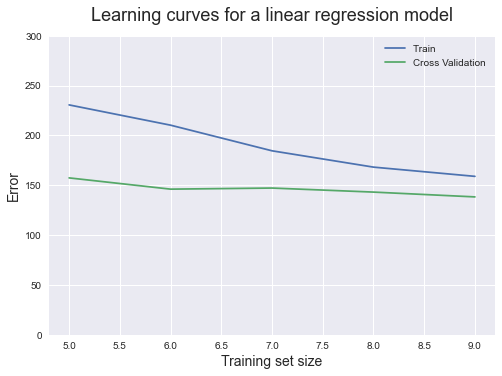

In [49]:
train_sizes, train_scores, validation_scores = learning_curve(estimator = models['Lasso'],
                                                                X = X_s_normalize, y = y, train_sizes = train_sizes, cv = 5,
                                                                scoring = 'neg_mean_squared_error')
    
print('Training scores:\n\n', train_scores)
print('\n', '-' * 70) # separator to make the output easy to read
print('\nValidation scores:\n\n', validation_scores)


train_scores_mean = -train_scores.mean(axis = 1)
validation_scores_mean = -validation_scores.mean(axis = 1)
print('Mean training scores\n\n', pd.Series(train_scores_mean, index = train_sizes))
print('\n', '-' * 20) # separator
print('\nMean validation scores\n\n',pd.Series(validation_scores_mean, index = train_sizes))



plt.style.use('seaborn')
plt.plot(train_sizes, train_scores_mean, label = 'Train ')
plt.plot(train_sizes, validation_scores_mean, label = 'Cross Validation')
plt.ylabel('Error', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curves for a linear regression model', fontsize = 18, y = 1.03)
plt.legend()
plt.ylim(0,300)

/Users/diegosilvadesalles/Documents/mestrado/Material Mestrado/Bezerra Machine Learning/codes/bezerra-works/trabalho2/trabalho2/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/diegosilvadesalles/Documents/mestrado/Material Mestrado/Bezerra Machine Learning/codes/bezerra-works/trabalho2/trabalho2/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/diegosilvadesalles/Documents/mestrado/Material Mestrado/Bezerra Machine Learning/codes/bezerra-works/trabalho2/trabalho2/lib/python3.8/site-packages/sklearn/utils/validation.py", line 72, in inner_f
    return f(**kwargs)
  File "/Users/diegosilvadesalles/Documents/mestrado/Material Mestrado/Bezerra Machine Learning/codes/bezerra-works

/Users/diegosilvadesalles/Documents/mestrado/Material Mestrado/Bezerra Machine Learning/codes/bezerra-works/trabalho2/trabalho2/lib/python3.8/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/diegosilvadesalles/Documents/mestrado/Material Mestrado/Bezerra Machine Learning/codes/bezerra-works/trabalho2/trabalho2/lib/python3.8/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/diegosilvadesalles/Documents/mestrado/Material Mestrado/Bezerra Machine Learning/codes/bezerra-works/trabalho2/trabalho2/lib/python3.8/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/diegosilvadesalles/Documents/mestrad

/Users/diegosilvadesalles/Documents/mestrado/Material Mestrado/Bezerra Machine Learning/codes/bezerra-works/trabalho2/trabalho2/lib/python3.8/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/diegosilvadesalles/Documents/mestrado/Material Mestrado/Bezerra Machine Learning/codes/bezerra-works/trabalho2/trabalho2/lib/python3.8/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/diegosilvadesalles/Documents/mestrado/Material Mestrado/Bezerra Machine Learning/codes/bezerra-works/trabalho2/trabalho2/lib/python3.8/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/diegosilvadesalles/Documents/mestrad

/Users/diegosilvadesalles/Documents/mestrado/Material Mestrado/Bezerra Machine Learning/codes/bezerra-works/trabalho2/trabalho2/lib/python3.8/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/diegosilvadesalles/Documents/mestrado/Material Mestrado/Bezerra Machine Learning/codes/bezerra-works/trabalho2/trabalho2/lib/python3.8/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/diegosilvadesalles/Documents/mestrado/Material Mestrado/Bezerra Machine Learning/codes/bezerra-works/trabalho2/trabalho2/lib/python3.8/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/diegosilvadesalles/Documents/mestrad

/Users/diegosilvadesalles/Documents/mestrado/Material Mestrado/Bezerra Machine Learning/codes/bezerra-works/trabalho2/trabalho2/lib/python3.8/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/diegosilvadesalles/Documents/mestrado/Material Mestrado/Bezerra Machine Learning/codes/bezerra-works/trabalho2/trabalho2/lib/python3.8/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/diegosilvadesalles/Documents/mestrado/Material Mestrado/Bezerra Machine Learning/codes/bezerra-works/trabalho2/trabalho2/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last

/Users/diegosilvadesalles/Documents/mestrado/Material Mestrado/Bezerra Machine Learning/codes/bezerra-works/trabalho2/trabalho2/lib/python3.8/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/diegosilvadesalles/Documents/mestrado/Material Mestrado/Bezerra Machine Learning/codes/bezerra-works/trabalho2/trabalho2/lib/python3.8/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/diegosilvadesalles/Documents/mestrado/Material Mestrado/Bezerra Machine Learning/codes/bezerra-works/trabalho2/trabalho2/lib/python3.8/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/diegosilvadesalles/Documents/mestrad

/Users/diegosilvadesalles/Documents/mestrado/Material Mestrado/Bezerra Machine Learning/codes/bezerra-works/trabalho2/trabalho2/lib/python3.8/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/diegosilvadesalles/Documents/mestrado/Material Mestrado/Bezerra Machine Learning/codes/bezerra-works/trabalho2/trabalho2/lib/python3.8/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/diegosilvadesalles/Documents/mestrado/Material Mestrado/Bezerra Machine Learning/codes/bezerra-works/trabalho2/trabalho2/lib/python3.8/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/diegosilvadesalles/Documents/mestrad

Training scores:

 [[         nan          nan          nan          nan          nan]
 [         nan          nan          nan          nan          nan]
 [         nan          nan          nan          nan          nan]
 [         nan          nan          nan          nan          nan]
 [-49.90253311 -60.11040817 -42.67232259 -42.67232259 -42.67232259]
 [-43.22610209 -50.91242765 -34.65228428 -34.65228428 -34.65228428]
 [-36.7952406  -46.03703325 -28.99114912 -42.15904658 -42.15904658]
 [-32.24111054 -40.52615436 -24.78983845 -37.1765611  -37.1765611 ]
 [-48.13258587 -57.66638031 -23.27456923 -33.2563392  -33.09662371]]

 ----------------------------------------------------------------------

Validation scores:

 [[          nan           nan           nan           nan           nan]
 [          nan           nan           nan           nan           nan]
 [          nan           nan           nan           nan           nan]
 [          nan           nan           nan           

(0.0, 300.0)

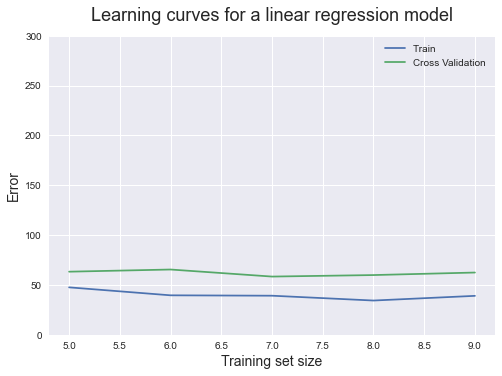

In [61]:
train_sizes, train_scores, validation_scores = learning_curve(estimator = models['Ridge'],
                                                                X = X_s_normalize, y = y, train_sizes = train_sizes, cv = 5,
                                                                scoring = 'neg_mean_squared_error')
    
print('Training scores:\n\n', train_scores)
print('\n', '-' * 70) # separator to make the output easy to read
print('\nValidation scores:\n\n', validation_scores)


train_scores_mean = -train_scores.mean(axis = 1)
validation_scores_mean = -validation_scores.mean(axis = 1)
print('Mean training scores\n\n', pd.Series(train_scores_mean, index = train_sizes))
print('\n', '-' * 20) # separator
print('\nMean validation scores\n\n',pd.Series(validation_scores_mean, index = train_sizes))



plt.style.use('seaborn')
plt.plot(train_sizes, train_scores_mean, label = 'Train ')
plt.plot(train_sizes, validation_scores_mean, label = 'Cross Validation')
plt.ylabel('Error', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curves for a linear regression model', fontsize = 18, y = 1.03)
plt.legend()
plt.ylim(0,300)

### Apos encontrar o modelo de regressao mais adequado, gere as curvas de aprendizado correspondentes. Vocˆe pode concluir que o problema de overfitting foi resolvido? Tanto no  modelo do Lasso quando nn Ridge Regression o problema foi bastante amenizado, sendo que no Ridge se obteve um melhor resultado